# Principal Component Regression

In [3]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import scale
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline

In [4]:
df_test = pd.read_csv('C:/Users/dillo/OneDrive/Desktop/PhD Data Science/00 - Classes/DDS-8555 Predictive Analysis/Assignment_3/Data/test.csv')
df_train = pd.read_csv('C:/Users/dillo/OneDrive/Desktop/PhD Data Science/00 - Classes/DDS-8555 Predictive Analysis/Assignment_3/Data/train.csv')

In [5]:
ID_COL = "id"
OBJECT_COL = "Rings"
DROP_COLs = []

num_features = df_train.select_dtypes(include=['int64', 'float64'])
num_features = num_features.columns.drop(DROP_COLs + [OBJECT_COL])
print(num_features)

X_train = df_train[num_features]
X_test = df_test[num_features]
y_train = df_train[OBJECT_COL]

Index(['id', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight'],
      dtype='object')


In [6]:
pca = PCA(n_components = 5)

reg = LinearRegression()
pipeline = Pipeline(steps = [('pca', pca),
                             ('reg',reg)])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_train)

In [7]:
y_pred

array([10.59738172, 11.81717507,  4.53779891, ...,  7.28248976,
        6.7941268 ,  7.83596914])

In [8]:
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = pipeline.score(X_train, y_train)

print(f'Number of features before PCR: {X_train.shape[1]}')
print(f'Number of features after PCR: {pca.n_components_}')

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R^2: {r2:.2f}')

Number of features before PCR: 8
Number of features after PCR: 5
MAE: 1.40
MSE: 4.12
RMSE: 2.03
R^2: 0.59


## Using the PCA model the test set.

In [10]:
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)

pred = regr.predict(X_reduced_test)




In [62]:
submissionComponentRegression = pd.DataFrame({ID_COL: df_test[ID_COL], OBJECT_COL: pred})
submissionComponentRegression.to_csv("C:/Users/dillo/OneDrive/Desktop/PhD Data Science/00 - Classes/DDS-8555 Predictive Analysis/Assignment_3/Data/submission_component_regression.csv", index = False)

# Regularized Regression

This secion will utilizing Lasso Regression

In [14]:
from sklearn.linear_model import Lasso

In [15]:
rr_df_test = pd.read_csv('C:/Users/dillo/OneDrive/Desktop/PhD Data Science/00 - Classes/DDS-8555 Predictive Analysis/Assignment_3/Data/test.csv')
rr_df_train = pd.read_csv('C:/Users/dillo/OneDrive/Desktop/PhD Data Science/00 - Classes/DDS-8555 Predictive Analysis/Assignment_3/Data/train.csv')

In [16]:
rr_ID_COL = "id"
rr_OBJECT_COL = "Rings"
rr_DROP_COLs = []

rr_num_features = rr_df_train.select_dtypes(include=['int64', 'float64'])
rr_num_features = rr_num_features.columns.drop(rr_DROP_COLs + [rr_OBJECT_COL])
print(rr_num_features)

rr_X_train = rr_df_train[rr_num_features]
rr_X_test = rr_df_test[rr_num_features]
rr_y_train = rr_df_train[rr_OBJECT_COL]

Index(['id', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight'],
      dtype='object')


In [17]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10], random_state = 0).fit(rr_X_train, rr_y_train)

print(lasso_cv.score(rr_X_train, rr_y_train))

0.5993320605934389


In [18]:
lasso_cv_pred = lasso_cv.predict(rr_X_test)
lasso_cv_pred


array([ 8.46928104,  9.87039834, 10.08044511, ..., 11.34820869,
       13.63019576,  8.14642359])

In [19]:
rr_df_test.size

543699

In [64]:
submissionLassoRegression = pd.DataFrame({rr_ID_COL: rr_df_test[rr_ID_COL], rr_OBJECT_COL: lasso_cv_pred})
submissionLassoRegression.to_csv("C:/Users/dillo/OneDrive/Desktop/PhD Data Science/00 - Classes/DDS-8555 Predictive Analysis/Assignment_3/Data/submission_lasso_regression.csv", index = False)

# Conceptual & Applied Questions

## Conceptual Question #1

1. We perform best subset, forward stepwise, and backward stepwise selection on a single data set. For each approach, we obtain p+1 models, containing 0,1, 2…, p predictors. Explain your answers:
   * Which of the three models with k predictors has the smallest training RSS? **The model with the best subset selection has the smallest training RSS since it considers every possible model with k predictors. Thus, it could happen that the other two approaches die end up picking the same model.**
   *  Which of the three models with k predictors has the smallest test RSS? **Hard to say with the information given. Best subset may overfit if n is relatively small compared to p. Also, the other two methods may pick a model that performs better on test set by luck.**
   *  True or False:
  
      i. The predictors in the k-variable model identified by forward step wise are a subset of the predictors in the (k+1)-variable model identified by forward stepwise selection. **TRUE**
      
      ii. The predictors in the k-variable model identified by backward stepwise are a subset of the predictors in the (k+1). **TURE**

      iii. The predictors in the k-variable model identified by backward stepwise are a subset of the predictors in the (k+1)-variable model identified by forward stepwise selection. **FALSE**
      
      
iv 	The predictors in th ek-variable model identified by forward stepwise are a subset of the predictors in the (k+1)-variable model identified by backward stepwise selection.**FALSE**

      
 .	The predictors in the k-variable model identified by best subset are a subset of the predictors in the (k+1)-variable model identified by best subset selectio **FALSE**SE


## Applied Question #8

### In this exercise, we will generate simulated data, and will then use this data to perfrom forward and backward stepwise selection.

- Create a random number generator and use its normal() method to generate a prdictor $X$ of length n = 100, as well as a noise vector $\epsilon$ of length n = 100.

In [26]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Setting the seed for reproducibility
np.random.seed(42)

n = 100
X = np.random.normal(0, 1, n)
E = np.random.normal(0, 1, n) # E represents epsilon 

 - Generate a response vector Y of length n = 100 according to the model
   
   Y = $\beta$0 + $\beta$1X + $\beta$2X<sup>2</sup> + $\beta$3X<sup>3</sup> + $\epsilon$,
   
   where $\beta$0, $\beta$1, $\beta$2, and $\beta$3 are constants of your choice.

In [28]:
beta0, beta1, beta2, beta3 = 1, 2, 3, -2
Y = beta0 + beta1 * X + beta2 * X**2 + beta3 * X**3 + E

- Use forward stepwise seleection in order to select a model containing the predictors $X$, $X$<sup>2</sup>, ..., $X$<sup>10</sup>. What is the model obtained occording to C<sub>p</sub>? Report the coefficients of the model obtained. 

In [30]:
# Implementing a forward selection function
def forward_selection( X, y):
    features = ['X' + str(i) for i in range(1, 11)]
    X_df = pd.DataFrame({f: X**i for i , f in enumerate(features, 1)})

    selected = []
    while len(selected) < len(features):
        remaining = list(set(features) - set(selected))
        best_feature = None
        best_aic = np.inf
        for feature in remaining:
            model = LinearRegression()
            X_temp = X_df[selected + [feature]]
            model.fit(X_temp, y)
            y_pred = model.predict(X_temp)
            aic = len(y) * np.log(np.mean((y - y_pred)**2)) + 2 * (len(selected) + 2)
            if aic < best_aic:
                best_aic = aic
                best_feature = feature
        selected.append(best_feature)

    return selected

selected_features = forward_selection(X, Y)
print("Forward selection:", selected_features)

# Fitting the final model
X_forward = pd.DataFrame({f: X**i for i, f in enumerate(selected_features, 1)})
model_forward = LinearRegression().fit(X_forward, Y)
print("Coefficients:", dict(zip(selected_features, model_forward.coef_)))

Forward selection: ['X4', 'X3', 'X2', 'X1', 'X10', 'X8', 'X6', 'X5', 'X7', 'X9']
Coefficients: {'X4': 1.4471149999810835, 'X3': 2.1405832637997486, 'X2': -0.08479355550195217, 'X1': 3.014756174875707, 'X10': -2.09019344449532, 'X8': -2.4130242447820267, 'X6': 0.8639188788643204, 'X5': 0.7334659904092777, 'X7': -0.11814616333379035, 'X9': -0.07637439520907563}


- Repeat the above step using backwards stepwise selection. How does your answer compare to the results above?

In [32]:
# Implementing a backward selection function
def backward_selection(X, y):
    features = ['X' + str(i) for i in range(1, 11)]
    X_df = pd.DataFrame({f: X**i for i, f in enumerate(features, 1)})
    
    selected = features.copy()
    while len(selected) > 1:
        best_aic = np.inf
        worst_feature = None
        for feature in selected:
            model = LinearRegression()
            X_temp = X_df[list(set(selected) - set([feature]))]
            model.fit(X_temp, y)
            y_pred = model.predict(X_temp)
            aic = len(y) * np.log(np.mean((y - y_pred)**2)) + 2 * (len(selected) - 1)
            if aic < best_aic:
                best_aic = aic
                worst_feature = feature
        selected.remove(worst_feature)
        
    return selected

selected_features_back = backward_selection(X, Y)
print("Backward selection:", selected_features_back)

# Fit final model
X_backward = pd.DataFrame({f: X**i for i, f in enumerate(selected_features_back, 1)})
model_backward = LinearRegression().fit(X_backward, Y)
print("Coefficients:", dict(zip(selected_features_back, model_backward.coef_)))

Backward selection: ['X5']
Coefficients: {'X5': -4.050195479229519}


- Now fit a lasso model to the simulated data, again using $X$, $X$<sup>2</sup>, ..., $X$<sup>10</sup> as predictors. Use cross-validation to select the optimal value of $\lambda$. Create plots of the cross-validation error as a funtion of $\lambda$. Report the resulting coefficient estimates, and discuss the results obtained. 

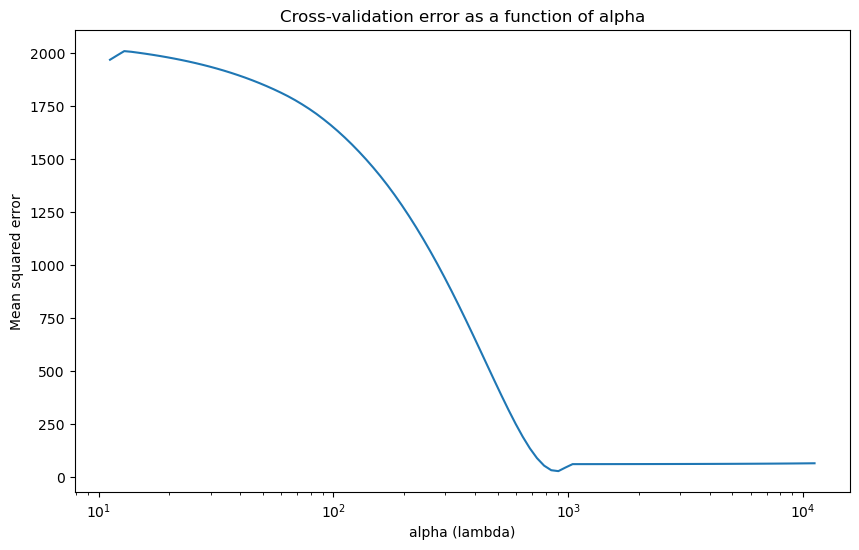

Optimal alpha: 907.1620

Coefficient estimates:
X^10: 0.0031

Mean Squared Error on test set: 9.2395

Model converged


In [34]:
# Prepare the data
X_lasso = np.column_stack([X**i for i in range(1, 11)])
feature_names = [f'X^{i}' for i in range(1, 11)]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_lasso, Y, test_size=0.3, random_state=42)

# Fit LassoCV
lasso_cv = LassoCV(cv=5, random_state=42, max_iter = 100000)
lasso_cv.fit(X_train, y_train)

# Plot cross-validation error as a function of alpha (lambda)
plt.figure(figsize=(10, 6))
plt.semilogx(lasso_cv.alphas_, lasso_cv.mse_path_.mean(axis= -1))
plt.xlabel('alpha (lambda)')
plt.ylabel('Mean squared error')
plt.title('Cross-validation error as a function of alpha')
plt.show()

# Report optimal alpha and coefficients
print(f"Optimal alpha: {lasso_cv.alpha_:.4f}")
print("\nCoefficient estimates:")
for name, coef in zip(feature_names, lasso_cv.coef_):
    if abs(coef) > 1e-5: 
        print(f"{name}: {coef:.4f}")

# Evaluate on test set
y_pred = lasso_cv.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error on test set: {mse:.4f}")

# Check convergence
if lasso_cv.n_iter_ < lasso_cv.max_iter:
    print("\nModel converged")
else:
    print("\nModel did not converge. Consider increasing max_iter or adjusting tol.")

- Now generate a response vector Y according to the model
  
Y = $B$<sub>0</sub> + $B$<sub>7</sub>$X$<sup>7</sup> + $\epsilon$

and perform forward stepwise selection and the lasso. Discuss the results obtained. 

In [36]:
# Generate new Y
beta0, beta7 = 1, 2
Y_new = beta0 + beta7 * X**7 + E

# Perform forward stepwise selection
selected_features_new = forward_selection(X, Y_new)
print("Forward selection for new Y:", selected_features_new)

# Fit final model
X_forward_new = pd.DataFrame({f: X**i for i, f in enumerate(selected_features_new, 1)})
model_forward_new = LinearRegression().fit(X_forward_new, Y_new)
print("Coefficients:", dict(zip(selected_features_new, model_forward_new.coef_)))

Forward selection for new Y: ['X7', 'X2', 'X9', 'X5', 'X3', 'X4', 'X8', 'X6', 'X10', 'X1']
Coefficients: {'X7': -0.5528850000200086, 'X2': -0.8594167361996992, 'X9': 1.9152064444987702, 'X5': 3.0147561748756893, 'X3': -2.0901934444955477, 'X4': -2.4130242447821932, 'X8': 2.8639188788643644, 'X6': 0.7334659904093239, 'X10': -0.11814616333379746, 'X1': -0.07637439520908074}
